# Clustering - voorbeelden


## k-Means - voorbeeld 1 ijswinkels

In dit voorbeeld gaan we op zoek naar logische clusters binnen een keten van ijswinkels.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [60]:
from sklearn.cluster import KMeans

# We hebben voor acht winkels de verkochte hoeveelheid ijsjes in de smaken chocolade en vanille
X = [[12, 6],
     [15,16],
     [18,17],
     [10, 8],
     [ 8, 7],
     [ 9, 6],
     [12, 9],
     [20,18]]

# doe de clustering
iceMeans = KMeans(n_clusters=2, random_state=0).fit(X)

# druk de middelpunten af
print(iceMeans.cluster_centers_)

# deel twee nieuwe winkels in:
print(iceMeans.predict([[11, 15], [20, 4]]))

[[10.2         7.2       ]
 [17.66666667 17.        ]]
[1 0]


In [61]:
# Dit zijn de clustermiddelpunten
print(iceMeans.cluster_centers_)

[[10.2         7.2       ]
 [17.66666667 17.        ]]


In [62]:
# In dit dataframe gaan we de initiële gegevens opslaan en later ook de gevonden clusters toevoegen
ijsdf = pd.DataFrame(X)
ijsdf.columns = ['Chocolate', 'Vanille']
ijsdf

,Chocolate,Vanille
0,12,6
1,15,16
2,18,17
3,10,8
4,8,7
5,9,6
6,12,9
7,20,18


In [63]:
# De gevonden clusters voegen we hier toe 
ijsdf['Groep'] = iceMeans.labels_
ijsdf

,Chocolate,Vanille,Groep
0,12,6,0
1,15,16,1
2,18,17,1
3,10,8,0
4,8,7,0
5,9,6,0
6,12,9,0
7,20,18,1


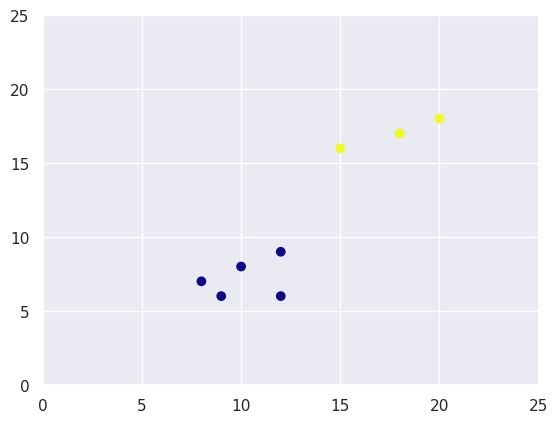

In [64]:
# We gaan de clusters nu visualiseren, dat is handig om te kunnen bepalen wat het verschil is tussen beide clusters
# Je zou misschien verwachten dat er winkels zijn die vooral veel chocolade verkopen en andere die juist veel vanille verkopen
plt.scatter(ijsdf['Chocolate'], ijsdf['Vanille'], c=ijsdf['Groep'], cmap='plasma')
plt.xlim(0,25)
plt.ylim(0,25)

plt.show()

Het blijkt dat er drie winkels zijn die meer verkopen dan gemiddeld en vijf winkels die minder verkopen. Er is dus geen chocoladecluster en vanillecluster!

## kMeans versus Gaussian Mixture Models - voorbeeld

In dit notebook laat ik zien hoe kMeans en GMM werken, wat de overeenkomsten en wat de verschillen zijn.

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d



In [66]:
# Code van https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

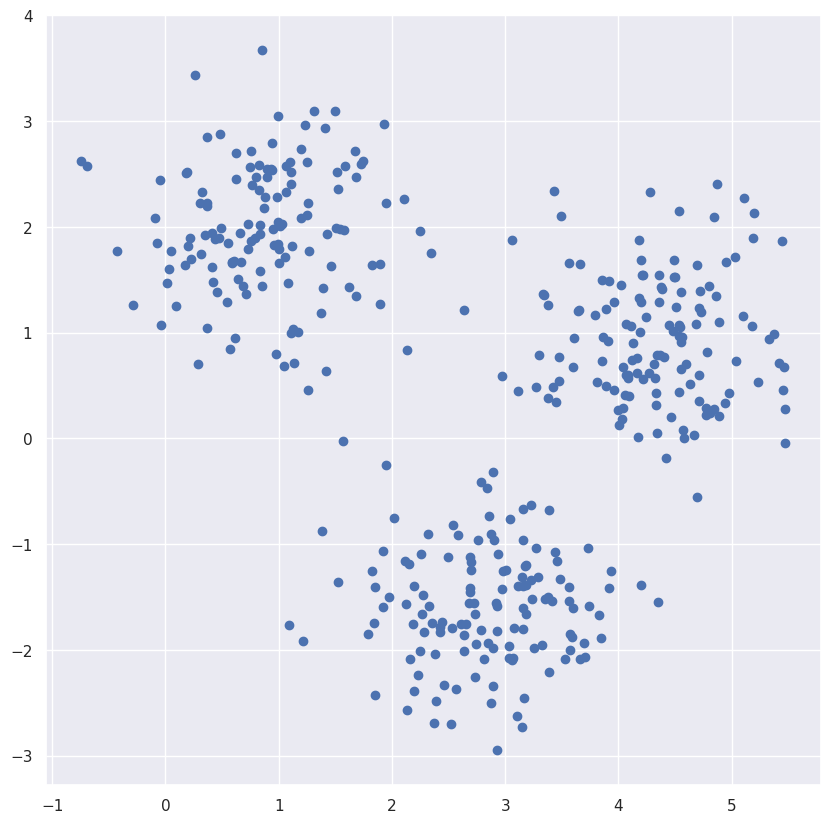

In [67]:
# Scatterplot van de punten
# Je ziet 3 'wolkjes' van data
plt.scatter(X[:,0],X[:,1],marker='o')
plt.gcf().set_size_inches((10, 10))  
plt.show()

### kMeans

1. Maak een kMeans model aan

In [68]:
model_kMeans = KMeans()

2. Kies de dataset

In [69]:
X_kMeans = X

3. Kies de hyperparameters

In [70]:
# We spelen vals, want we weten dat er 3 clusters zijn. Maar speel gerust met deze waarde en kijk wat het effect is!
number_clusters = 3
model_kMeans.set_params(n_clusters = number_clusters, random_state = 0)

KMeans(n_clusters=3, random_state=0)

4. Train het model

In [71]:
model_kMeans.fit(X_kMeans)

KMeans(n_clusters=3, random_state=0)

5. Toon de resultaten

In [72]:
# Het resultaat is dat elk van de punten uit X_kMeans is toegevoegd aan een cluster
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)

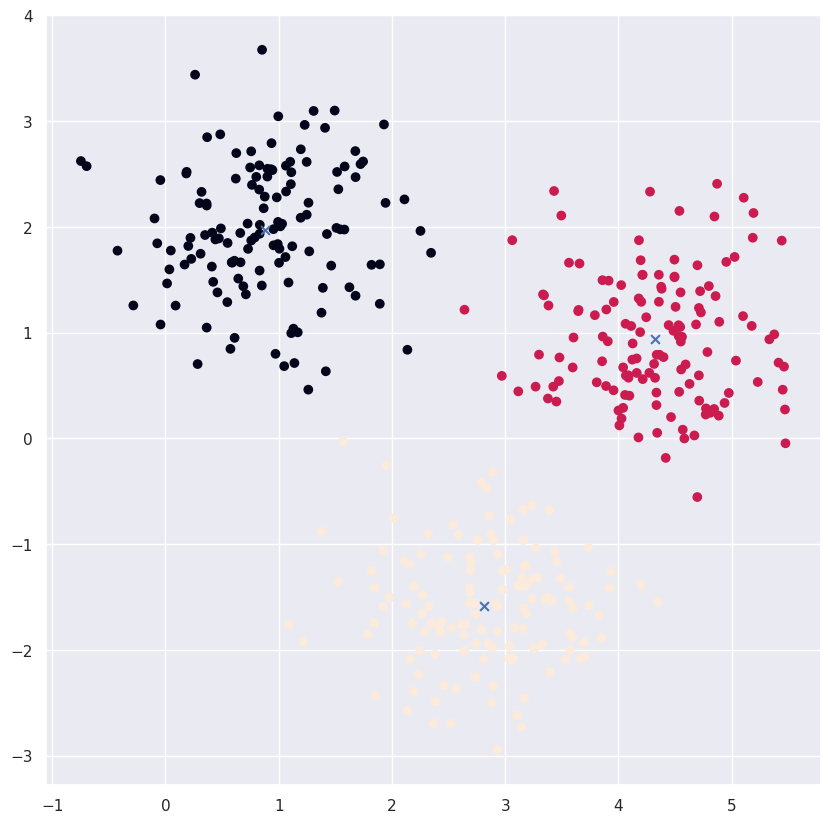

In [73]:
# In deze scatterplot heb ik de middelpunten (kMeans.cluster_centers_) toegevoegd, zie de 'x'
plt.scatter(X_kMeans[:,0],X_kMeans[:,1],marker='o', c=prediction_kMeans)
plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

#### Visualiseren met cirkels

In [74]:
# Code van https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# Deze code helpt om cirkels te plotten 
from scipy.spatial.distance import cdist

def plot_kmeans(kMeans, X, labels, n_clusters=number_clusters, rseed=0, ax=None):
    
    # plot the input data
    ax = ax or plt.gca()
    plt.gcf().set_size_inches((10, 10))
    plt.scatter(kMeans.cluster_centers_[:,0],kMeans.cluster_centers_[:,1],marker='x', s=40)
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the KMeans model
    centers = kMeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

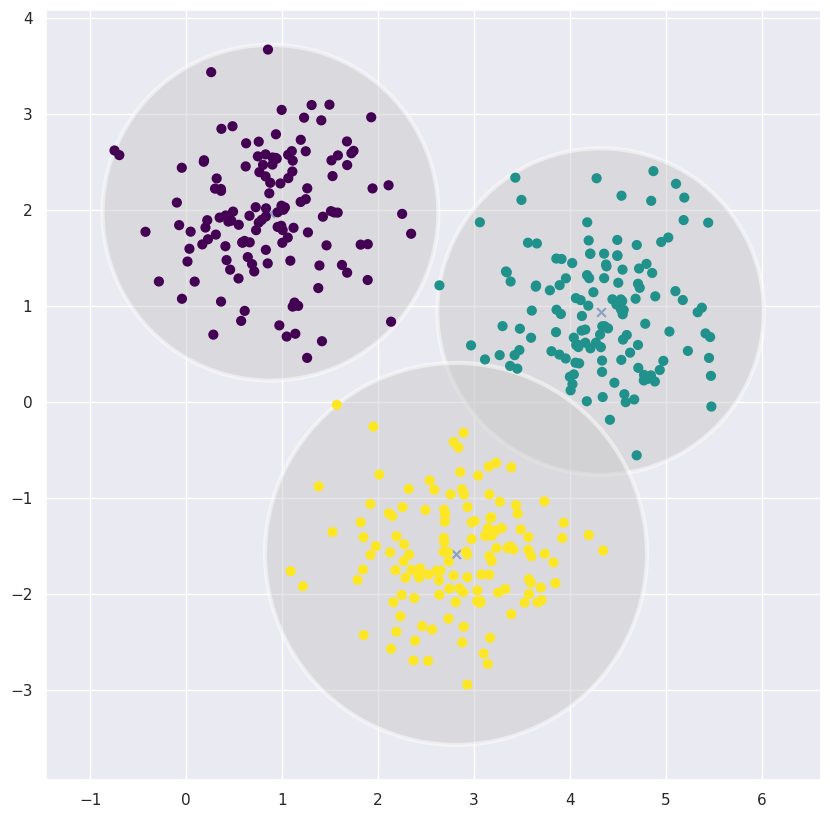

In [75]:
# Een veelgebruikte manier om gevonden clusters te visualiseren is met behulp van cirkels. 
# In onderstaande scatterplot zijn cirkels getoond voor elk cluster
plot_kmeans(model_kMeans, X_kMeans, prediction_kMeans)

Het gebruik van cirkels is handig om aan te tonen welke punten in een bepaald cluster vallen maar kan wel verwarrend zijn. 
Je mag er sowieso **niet** vanuit gaan dat alle punten in een cirkel noodzakelijkerwijs bij een bepaald cluster horen. Verander het aantal clusters bijvoorbeeld naar 4.

Voor elk **nieuw** punt moet je dus alleen naar de afstand tot de middelpunten kijken, niet naar deze cirkels. De cirkels zijn alleen bedoeld om te helpen met de logica achter de gevonden clusters te bepalen.

#### Visualiseren met behulp van een Voronoi-diagram
Het gebruik maken van een Voronoi diagram kan nuttig zijn. De clusters worden daarin gescheiden door 'boundaries'. Een punt zal niet in meerdere clusters kunnen vallen hierdoor.

Let ook hier wel op: de boundaries zijn net als de cirkels verwarrend. Neem een willekeurig nieuw punt met coördinaten (0, 1000), dat valt binnen het vlak van het groene cluster maar ligt enorm ver van het clustermiddelpunt af. Het is de vraag of dit punt dan ook bij het groene cluster zou moeten horen of niet...

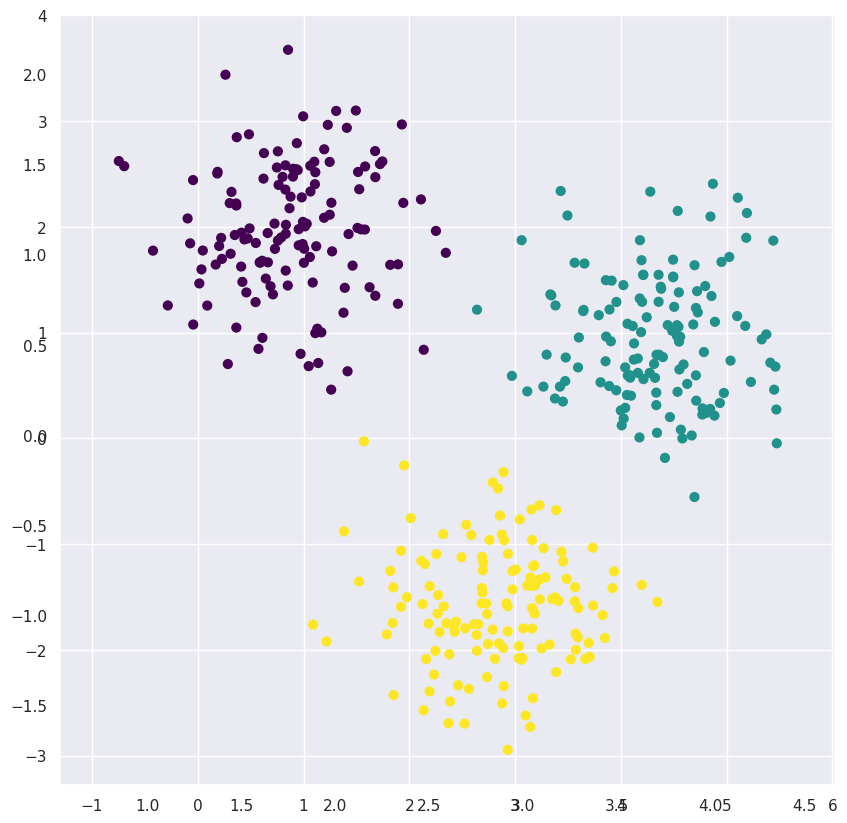

In [76]:
# Voronoi diagram plotten i.c.m. scatter plot
vor = Voronoi(model_kMeans.cluster_centers_)
fig = voronoi_plot_2d(vor)
plt.gcf().set_size_inches((10, 10))

ax = fig.add_subplot()
ax.axis('equal')
ax.scatter(X_kMeans[:, 0], X_kMeans[:, 1], c=prediction_kMeans, s=40, cmap='viridis', zorder=2)

plt.show()

#### Visualiseren met behulp cirkels én een Voronoi-diagram
Je kunt de cirkels en het Voronoi-diagram natuurlijk ook combineren. Dat geeft net even iets meer informatie. Het punt (0, 1000) valt wel in het groene vlak maar zou heel ver buiten cirkel liggen. 

In [77]:
# Dit is een uitbreiding van de functie plot_kmeans om de cirkels samen met de Voronoi te kunnen plotten
from scipy.spatial.distance import cdist

def plot_kmeans_voronoi(kMeans, X, labels, n_clusters=number_clusters, rseed=0, ax=None):
    vor = Voronoi(model_kMeans.cluster_centers_)
    fig = voronoi_plot_2d(vor)
    plt.gcf().set_size_inches((10, 10))
    ax = fig.add_subplot()    
    ax.axis('equal')

    # plot the input data
    plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = model_kMeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
    plt.show()

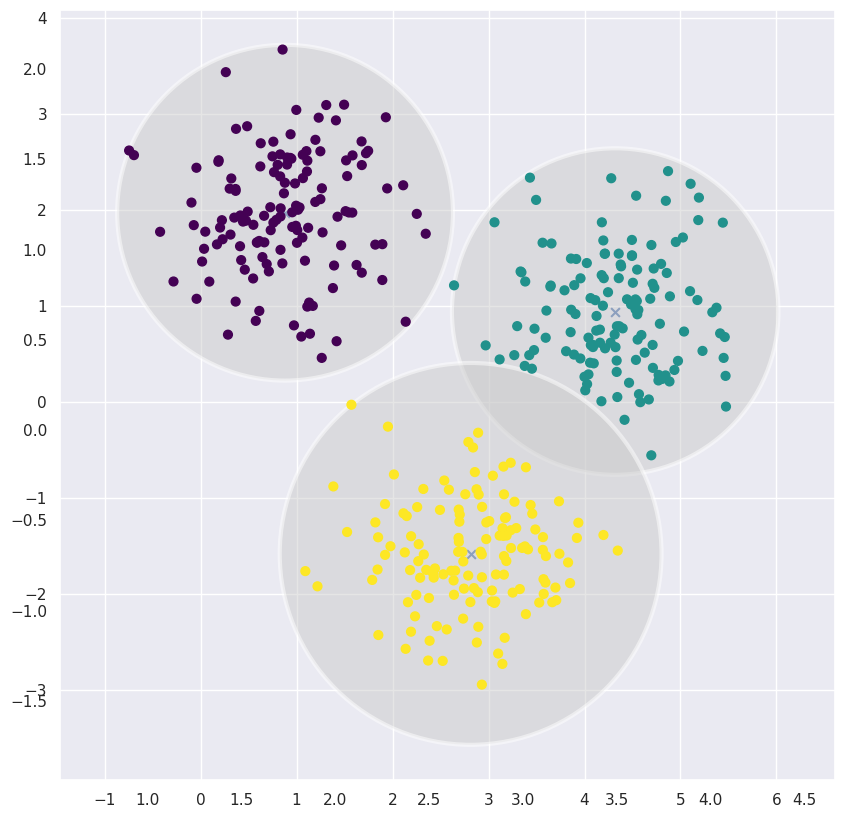

In [78]:
plot_kmeans_voronoi(model_kMeans, X_kMeans, prediction_kMeans)

Je ziet in bovenstaande plaat dat de boundary tussen het paarse en gele cluster 'overschreden' wordt door beide cirkels.
Ik hoop hiermee aangetoond te hebben wat het probleem is met het gebruik van cirkels voor het visualiseren van de clusters en hoe de combinatie van de cirkels met het Voronoi-diagram goed kan werken.

### Nadelen van kMeans
Voor clusters van kMeans wordt een afstandsberekening uitgevoerd waarbij alle dimensies even zwaar mee tellen. Daarom worden cirkels gebruikt om de clusters te visualiseren: de punten op de rand van de cirkel zitten allemaal even ver van het middelpunt. 
In onderstaand voorbeeld wordt aangetoond dat dit voor sommige datasets geen handige aanpak is.

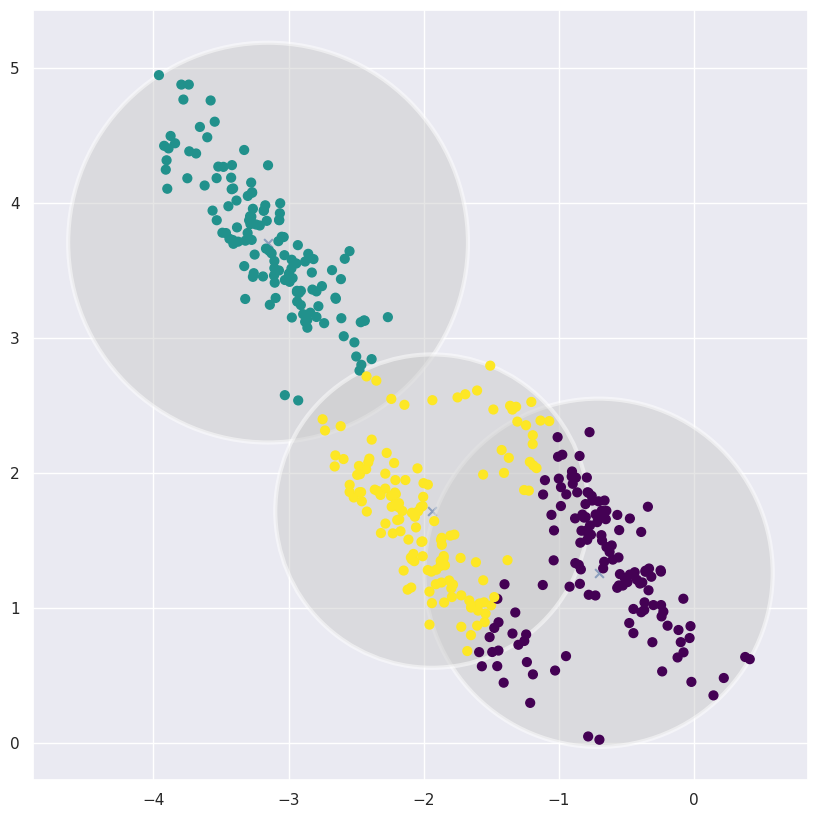

In [79]:
# Code komt van https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# Deze dataset bevat datapunten die niet in een 'ronde' wolk liggen, maar in meer ellipsachtige vorm
# We voeren stappen 1. t/m 5. nu in één keer uit

model_kMeans2 = KMeans(n_clusters=3, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X_kMeans, rng.randn(2, 2))
prediction_kMeans2 = model_kMeans2.fit_predict(X_stretched)
plot_kmeans(model_kMeans2, X_stretched, prediction_kMeans2)

Je ziet nu dat er enorm veel overlap is tussen het gele en groene cluster. Met het blote oog zie je dat er ook geen sprake is van ronde clusters, maar eerder langwerpige clusters. De clustering lijkt dus niet logisch en dat komt door de beperkingen van kMeans. Gelukkig hebben we ook Gaussian Mixture Models om clusters te zoeken.

## Gaussian Mixture Models
Gaussian Mixture Models kun je omschrijven als een verbeterde versie van kMeans. GMM's kunnen met verschillende clustervormen overweg en werken daarnaast met probabilities. Een punt kan met kans 1.0 in een bepaald cluster wanneer het heel dicht bij een clustermiddelpunt zit. Maar voor sommige punten die tussen twee clustermiddelpunten zitten is het moeilijk om te zeggen cluster A of B. Dan wordt met een kans aangegeven hoe groot de kans is dat het punt bij cluster A of B hoort. Dat is relaxed want zoals we weten kan en hoeft een model niet altijd dezelfde zekerheid bieden bij het maken van een voorspelling.

1. Maak een GMM model aan

In [80]:
model_gmm = GaussianMixture()


2. Kies de dataset

In [81]:
X_gmm = X_stretched

3. Kies de hyperparameters

In [82]:
number_clusters = 3
model_gmm.set_params(n_components = number_clusters, random_state = 0)

GaussianMixture(n_components=3, random_state=0)

4. Train het model

In [83]:
model_gmm.fit(X_gmm)

GaussianMixture(n_components=3, random_state=0)

5. Toon de klassen van de gegeven waarden

In [84]:
# Bepaal eerst de clusters van elk punt
prediction_gmm = model_gmm.predict(X_gmm)

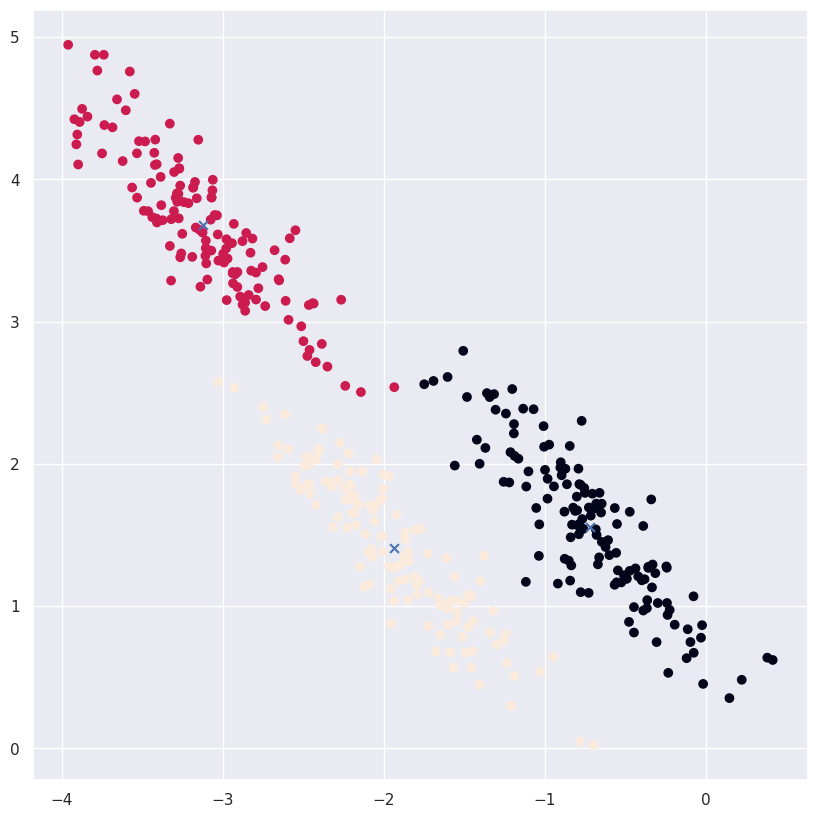

In [85]:
# In de scatterplot heb ik de middelpunten toegevoegd
plt.scatter(X_gmm[:,0],X_gmm[:,1],marker='o', c=prediction_gmm)
plt.scatter(model_gmm.means_[:,0],model_gmm.means_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

In [86]:
# Code komt van https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# Deze code helpt om ellipsen te plotten
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    plt.gcf().set_size_inches((10, 10))  

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, labels, label=True, ax=None):
    ax = ax or plt.gca()
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=20, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

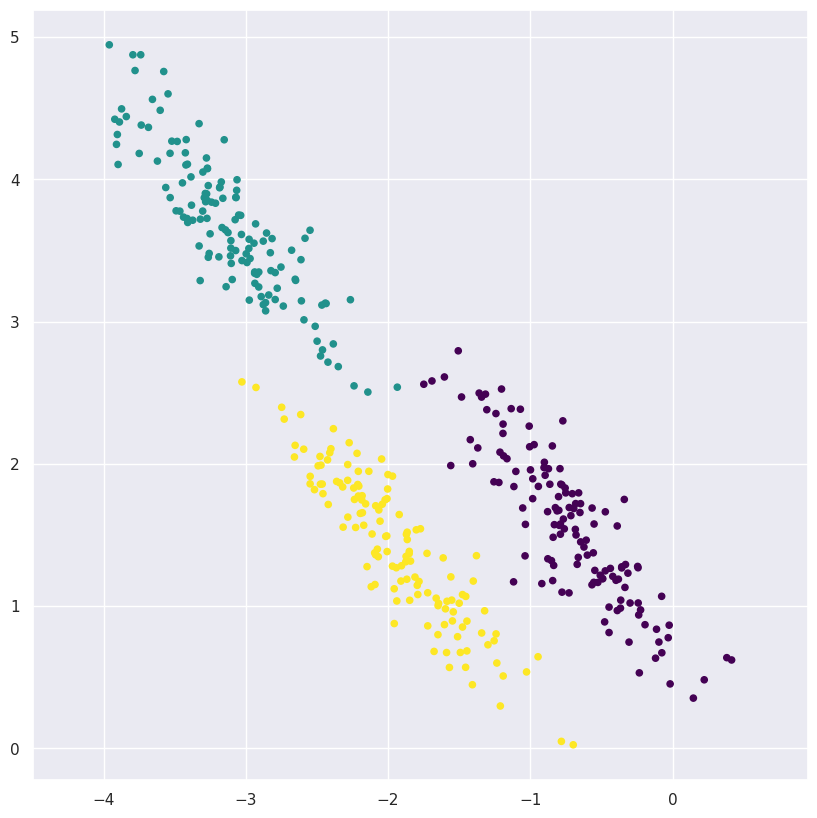

In [87]:
# Hieronder wordt gevisualiseerd hoe de clusters eruit zien
plot_gmm(model_gmm, X_gmm, prediction_gmm)

Je ziet dat de clusters geen ronde vorm hebben maar een ellipsachtige vorm.
Je ziet ook verschillende kleuren: hoe lichter de kleur blauw, hoe verder een punt van het clustermiddelpunt is en hoe kleiner de kans dat een punt tot een cluster behoort.

6. Het model in de praktijk gebruiken

In [ ]:
# We gaan voor vier punten bepalen tot welk cluster ze behoren:
# 1. het eerst gevonden clustermiddelpunt, 
# 2. een punt tussen het gele en paarse cluster (-2.8, 2.8),
# 3. een punt dat tussen het gele, paarse én groene cluster valt (-1.7, 2),
# 4. een punt dat enorm uit de richting zit (0, 6).

X_extra_points = np.array([model_gmm.means_[1],[-2.8,2.8],[-1.7,2],[0,6]])

In [ ]:
# Hieronder zie je de vier nieuwe punten in de scatter plot met een sterretje
plt.scatter(X_gmm[:,0],X_gmm[:,1],marker='o', c=prediction_gmm)
plt.scatter(model_gmm.means_[:,0],model_gmm.means_[:,1],marker='x', s=200)
plt.scatter(X_extra_points[:,0], X_extra_points[:,1], marker=(5, 1), s=200, color='red')
plt.gcf().set_size_inches((10, 10))  
plt.show()

In [ ]:
# We gaan hieronder bepalen tot welke clusters deze punten behoren en aanvullende scores op een rijtje zetten

# Ten eerste bepalen we voor elk punt bij welk cluster deze hoort
clusters = np.around(model_gmm.predict(X_extra_points), decimals=1)

# Ten tweede bepalen we voor elk punt wat de waarschijnlijkheid is van die clustertoekenning
clusters_proba = np.around(model_gmm.predict_proba(X_extra_points), decimals=1)

# Tenslotte bepalen we voor elk sample de score van de clustertoekenning
clusters_score_samples = np.around(model_gmm.score_samples(X_extra_points), decimals=1)

In [ ]:
# Deze scores gaan we visualiseren
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
viridis = cm.get_cmap('viridis', 3)

fig, axs = plt.subplots(2, 2)
plt.gcf().set_size_inches((10, 10)) 
fig
axs[0, 0].set_title('Punt: ' + str(X_extra_points[0]))
axs[0, 0].set_xlabel('Cluster: ' + str(clusters[0]) + ' met score ' + str(clusters_score_samples[0]))
axs[0, 0].pie(clusters_proba[0], autopct='%1.1f%%', shadow=True, colors=viridis(range(4)))

axs[0, 1].set_title('Punt: ' + str(X_extra_points[1]))
axs[0, 1].set_xlabel('Cluster: ' + str(clusters[1]) + ' met score ' + str(clusters_score_samples[1]))
axs[0, 1].pie(clusters_proba[1], autopct='%1.1f%%', shadow=True, colors=viridis(range(4)))

axs[1, 0].set_title('Punt: ' + str(X_extra_points[2]))
axs[1, 0].set_xlabel('Cluster: ' + str(clusters[2]) + ' met score ' + str(clusters_score_samples[2]))
axs[1, 0].pie(clusters_proba[2], autopct='%1.1f%%', shadow=True, colors=viridis(range(4)))

axs[1, 1].set_title('Punt: ' + str(X_extra_points[3]))
axs[1, 1].set_xlabel('Cluster: ' + str(clusters[3]) + ' met score ' + str(clusters_score_samples[3]))
axs[1, 1].pie(clusters_proba[3], autopct='%1.1f%%', shadow=True, colors=viridis(range(4)))

plt.show()

Je ziet een aantal verschillen:
1. Punt 1 en 4 zijn allebei met een waarschijnlijkheid van 1 toegekend aan hun cluster.
    - Voor punt 1 is dat logisch, want dat is een clustermiddelpunt
    - Punt 4 is de *uitschieter*, die zit vooral dichtbij cluster 1, maar nog steeds erg ver weg
    - Je ziet daarom dat de score voor punt 4 veel lager is (-200 ongeveer) omdat deze veel verder van het clustermiddelpunt ligt dan punt 1 (score is -0.7).
2. Punten 2 en 3 zijn niet voor 100% toegekend aan één cluster maar aan respectievelijk 2 en 3 clusters. De hoogste waarschijnlijkheden zijn ook nog eens verschillend: 80% versus 50%.

### Kwaliteit clustering bepalen
De kwaliteit van de gevonden clusters zul je sowieso handmatig moeten beoordelen: zijn de gevonden clusters 'logisch'? Kun je er iets mee in de praktijk? Dat zijn de belangrijkste manieren om te bepalen of kwaliteit van de clusters goed is.

Daarnaast kun je de kwaliteit ook in een cijfer uitdrukken. De score van een clustering wordt gebaseerd op de afstanden van alle punten tot het middelpunt van hun cluster. Hoe dichter die score bij 0 komt, hoe dichter de punten bij hun clustermiddelpunt zitten en hoe dichter de punten bij elkaar zitten. Een goede score is positief, maar een té goede score is niet positief: dan kan er sprake van overfitting zijn. 

De allerlaagste bereik je door het aantal clusters gelijk te stellen aan het aantal punten: elk punt heeft dan z'n eigen cluster waarin dat punt het clustermiddelpunt 0 is. Maar dat is natuurlijk een clustering die zeer matig is...

Hieronder wordt getoond hoe je het ideale aantal clusters kunt vinden. 

In [ ]:
# In deze code wordt een kMeans model gemaakt voor 1, 2, ... n aantal clusters. De scores worden daarna geplot.
# We maken hier weer gebruik van de dataset waarmee we begonnen zijn
data = []

max_n = 20

for i in range(1, max_n):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
    data.append([i, model_kMeans.score(X_kMeans)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df['k'], df['Score'], '-o')

ax.legend(['k'])
ax.annotate('Knik', xy=(4,-350),xytext=(10,-1200), arrowprops=dict(facecolor='black',shrink=0.05))

In bovenstaande diagram zie je de foutscore van ongeveer -3.800 naar 0 convergeren. Je ziet dat er van k = 1 naar k = 2 een hele grote verbetering plaats vindt. Van k = 2 naar k = 3 en naar k = 4 vinden ook nog substantiële verbeteringen plaats. Daarna zie je dat het afzwakt.

Het idee is dat op de 'knik' (daarvoor zijn substantiële verbeteringen, daarna zwakt het af) de ideale waarde voor k zit. In dit voorbeeld zijn dat de 4 clusters waarmee we begonnen zijn.

In [ ]:
# In deze code wordt een GMM model gemaakt voor 1, 2, ... n aantal clusters. De scores worden daarna geplot.
# We maken hier weer gebruik van de dataset waarmee we begonnen zijn
data = []

max_n = 20

for i in range(1, max_n):
    model_gmm = GaussianMixture(n_components=i, random_state=0)
    prediction_gmm = model_gmm.fit(X_gmm)
    data.append([i, model_gmm.score(X_gmm)])

df = pd.DataFrame(data, columns=['n', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='n',
       ylabel='Score',
       title='GMM: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df['n'], df['Score'], '-o')

ax.legend(['n'])
ax.annotate('Knik', xy=(4,-1.7),xytext=(7,-1.8), arrowprops=dict(facecolor='black',shrink=0.05))

De knik is een *indicator* dat dit het optimale aantal clusters, maar dat is puur geredeneerd vanuit *overfitting*, niet vanuit wat logisch is. Bepaal dus ook altijd handmatig of de gevonden clusters logisch zijn of niet: kun je de gevonden groepen dus verklaren?